# Data Story: NBA Player Value Based on Win Shares and Salary

## Introduction:
#### Where should an organization put its money to generate the best chance at success? A question asked by businesses and professional sports teams alike; with the most accurate answer leading to favorable outcomes. I took a deeper dive into the NBA and analyzed players based on their productivity and their salary. Can we determine a player's true value to an organization in regards to specifically their on court production? What expectations do various salaries bring? Based upon production of a player, can we predict their value? 

#### This analysis aims to answer those questions and more to provide insights for organzitions to increase their rate of success.

## Sources of Data and Background Information

### The Data:
#### It's common for NBA fans to research stats and information regarding teams and players within the organization. The best part and possibly least appreciated is the fact that there is SO MUCH data publicly available. I (and many others) find themselves on [Basketball-Reference.com](https://www.basketball-reference.com) more frequent than others as it is a trusted and reliable source of statistical information for players and teams. For this analysis, I utilized NBA Advanced Player Statistics as well as their contract information. This data is available and kept up to date on a consistent basis. 

### More Info:
#### One caveat to my dataset is that is is only up to date through 4/6/2019. This means that it did not include all statistics through the entire regular season.

#### This analysis is largely relying on one particular data point for NBA Players, Win Shares (WS). This number is something that is calculated by Basketball-Reference and you can find more information regarding that by following [this link](https://www.basketball-reference.com/about/ws.html). In short, it is this: Win Shares is a player statistic which attempts to divvy up credit for team success to the individuals on the team. 

#### Utilizing player statistics and contract information, we can determine a lot of information regarding a players value to an organization, in theory.

## Let's Begin:

#### Start with importing required packages for this analysis. Packages will be used for data wrangling, data visualization and statistical analysis.

In [6]:
#import required packages
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas.core import datetools

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = (15, 8)

### Create Dataframe from csv
#### Last updated 4/7/2019, includes games through 4/6/2019


In [7]:
#creating player stats df from csv
df_stats = pd.read_csv('nba_player_stats-2.csv')

In [8]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.02,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4,9.1,0.168,0.8,2.2,3,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3,2.4


### There are headers throughout the table are in the csv for readability in the table. We are now removing those header rows for analysis purposes

In [9]:
df_stats = df_stats.drop(df_stats[(df_stats.Rk == 'Rk')].index)

In [10]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.02,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4,9.1,0.168,0.8,2.2,3,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3,2.4


### You can find a full definition of all column names at [NBA Advanced Stats](https://www.basketball-reference.com/leagues/NBA_2019_advanced.html)


In [11]:
list(df_stats)

['Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

### Let's view how columns were imported
##### We need to see what kind of object or type the columns are.

In [12]:
df_stats.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
MP        object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
OWS       object
DWS       object
WS        object
WS/48     object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

### Now we must cast a column to Float from an Object
##### This is the quick and easy pandas way of doing it.

In [13]:
# ORB% is an object as noted above now check the coloumn out.
df_stats['ORB%'] = pd.to_numeric(df_stats['ORB%'], errors='coerce')

In [14]:
df_stats.dtypes

Rk         object
Player     object
Pos        object
Age        object
Tm         object
G          object
MP         object
PER        object
TS%        object
3PAr       object
FTr        object
ORB%      float64
DRB%       object
TRB%       object
AST%       object
STL%       object
BLK%       object
TOV%       object
USG%       object
OWS        object
DWS        object
WS         object
WS/48      object
OBPM       object
DBPM       object
BPM        object
VORP       object
dtype: object

### Now we must convert all object to string object
##### We want to make sure we are working with the right type of strings here.

In [15]:
list_col = df_stats.columns

for col_name in list_col:
    df_stats[col_name] = df_stats[col_name].astype(str) # Cast from Object alone to String Object
    

In [16]:
df_stats.dtypes

Rk        object
Player    object
Pos       object
Age       object
Tm        object
G         object
MP        object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
OWS       object
DWS       object
WS        object
WS/48     object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

## Now for the fun part. Convert numerical columns from objects to Numerical Objects.
##### Find the list of columns we want as strings, and convert those we want to numerical columns.

In [17]:
def converted_df(df_stats, list_to_remove=[]):
    
    list_col_names = df_stats.columns
    col_name_to_not_convert = ['Rk', 'Player', 'Pos', 'Tm']

    # This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
    col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

    print('Columns to convert to Float: \n',col_name_to_convert)

In [18]:
list_col_names = df_stats.columns
col_name_to_not_convert = ['Rk', 'Player', 'Pos', 'Tm']
sothing = ['BLK%', 'DBPM', 'BPM', 'STL%', 'TRB%', 'OWS', 'TS%', 'DRB%', 'FTr', 'AST%', 'WS', 'VORP', 'USG%', 'ORB%', 'PER', 'Age', 'TOV%', 'G', 'WS/48', 'DWS', '3PAr', 'OBPM', 'MP']

# This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

print('Columns to convert to Float: \n',col_name_to_convert)

Columns to convert to Float: 
 ['USG%', 'FTr', 'DWS', 'OBPM', 'PER', 'ORB%', 'DRB%', 'OWS', 'BPM', '3PAr', 'STL%', 'Age', 'WS', 'G', 'TS%', 'DBPM', 'WS/48', 'TRB%', 'VORP', 'TOV%', 'MP', 'BLK%', 'AST%']


## Now convert the objects to Numerical objects.
##### This website may help to further understand the used cases of how to cast columns. [Pandas dtypes](https://pbpython.com/pandas_dtypes.html)

In [19]:
for col_name in col_name_to_convert:
    df_stats[col_name] = pd.to_numeric(df_stats[col_name], errors='coerce')

In [20]:
df_stats.dtypes

Rk         object
Player     object
Pos        object
Age         int64
Tm         object
G           int64
MP          int64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
OWS       float64
DWS       float64
WS        float64
WS/48     float64
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
dtype: object

In [21]:
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1
2,3,Jaylen Adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4.0,9.1,0.168,0.8,2.2,3.0,3.3
4,5,Bam Adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3.0,2.4


## As you can see, we cleaned up the dtypes of the stats dataset. Now we will do the same to the contract dataset.

In [22]:
df_contract = pd.read_csv('nba_player_contracts1.csv', index_col=False)
df_contract.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
2,2,Chris Paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
3,3,Russell Westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
4,4,LeBron James,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573


### You can find the full dataset of all contracts at [NBA Contracts](https://www.basketball-reference.com/contracts/players.html)

In [23]:
df_col_name = list(df_contract.iloc[0])
print(df_col_name)

['Rk', 'Player', 'Tm', 'year0', 'year1', 'year2', 'year3', 'year4', 'year5', 'Signed Using', ' Guaranteed ']


### For ease of further recall, the year of each contract has been translated. See the translation below.

##### year0 = 2018-19 season
##### year1 = 2019-20 
##### year2 = 2020-21
##### year3 = 2021-22
##### year4 = 2022-23
##### year5 = 2023-24

### The guaranteed amount would be the value that is guaranteed in their contract. 

##### You can see we have to remove the first row as their were two header rows in a row.

In [24]:
df_contract.columns = df_col_name
df_contract.head()

,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
2,2,Chris Paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
3,3,Russell Westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
4,4,LeBron James,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573


In [25]:
df_contract.drop(df_contract.head(1).index, inplace=True)
df_contract.head()

,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
1,1,Stephen Curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
2,2,Chris Paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
3,3,Russell Westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
4,4,LeBron James,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573
5,5,Blake Griffin,DET,32088932,34234964,36595996,38957028,NaN,NaN,Bird Rights,102919892


### Now we must begin the merging of the two datasets into one dataframe. We're going to use the players names as a point of reference, so first we have to make them identical. To be certain, we're going to make all of the names lowercase.

In [26]:
df_contract['Player'] = df_contract['Player'].str.lower()

In [27]:
df_contract.head()

,Rk,Player,Tm,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
1,1,stephen curry,GSW,37457154,40231758,43006362,45780966,NaN,NaN,Bird Rights,166476240
2,2,chris paul,HOU,35654150,38506482,41358814,44211146,NaN,NaN,NaN,159730592
3,3,russell westbrook,OKC,35654150,38178000,41006000,43848000,46662000,NaN,Bird Rights,158686150
4,4,lebron james,LAL,35654150,37436858,39219565,41002273,NaN,NaN,NaN,113310573
5,5,blake griffin,DET,32088932,34234964,36595996,38957028,NaN,NaN,Bird Rights,102919892


In [28]:
df_stats['Player'] = df_stats['Player'].str.lower()
df_stats.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,alex abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,7.9,12.2,0.1,0.6,0.7,0.054,-2.5,-1.0,-3.4,-0.2
1,2,quincy acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,15.2,9.2,-0.1,0.1,-0.1,-0.020,-5.6,-0.3,-5.9,-0.1
2,3,jaylen adams,PG,22,ATL,32,393,7.9,0.479,0.689,...,19.6,13.7,-0.1,0.2,0.1,0.014,-2.8,-1.5,-4.3,-0.2
3,4,steven adams,C,25,OKC,77,2593,18.9,0.596,0.003,...,12.6,16.4,5.1,4.0,9.1,0.168,0.8,2.2,3.0,3.3
4,5,bam adebayo,C,21,MIA,79,1841,17.8,0.623,0.028,...,17.3,15.6,3.4,3.2,6.6,0.171,-0.5,3.6,3.0,2.4


In [29]:
df_full_data = pd.merge(df_stats, df_contract, on='Player', how='outer')

## Now it is merged!

In [30]:
df_full_data.head(10)

,Rk_x,Player,Pos,Age,Tm_x,G,MP,PER,TS%,3PAr,...,Rk_y,Tm_y,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,alex abrines,SG,25.0,OKC,31.0,588.0,6.3,0.507,0.809,...,200,OKC,5455236,NaN,NaN,NaN,NaN,NaN,NaN,5455236
1,2,quincy acy,PF,28.0,PHO,10.0,123.0,2.9,0.379,0.833,...,509,PHO,213949,NaN,NaN,NaN,NaN,NaN,NaN,213949
2,3,jaylen adams,PG,22.0,ATL,32.0,393.0,7.9,0.479,0.689,...,508,ATL,236854,1416852,NaN,NaN,NaN,NaN,NaN,236854
3,4,steven adams,C,25.0,OKC,77.0,2593.0,18.9,0.596,0.003,...,28,OKC,24157304,25842697,27528090,NaN,NaN,NaN,1st Round Pick,77528091
4,5,bam adebayo,C,21.0,MIA,79.0,1841.0,17.8,0.623,0.028,...,272,MIA,2955840,3454080,5115492,NaN,NaN,NaN,1st Round Pick,6409920
5,6,deng adel,SF,21.0,CLE,17.0,187.0,1.7,0.376,0.629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,devaughn akoon-purcell,SG,25.0,DEN,7.0,22.0,8.2,0.322,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,lamarcus aldridge,C,33.0,SAS,79.0,2621.0,22.7,0.573,0.031,...,38,SAS,22347015,26000000,24000000,NaN,NaN,NaN,Cap Space,55347015
8,9,rawle alkins,SG,21.0,CHI,8.0,88.0,9.4,0.417,0.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,grayson allen,SG,23.0,UTA,35.0,347.0,6.1,0.514,0.589,...,338,UTA,2074320,2429400,2545320,4054695,NaN,NaN,1st Round Pick,4503720


In [31]:
df_full_data.to_csv('nba_full_dataframe.csv', index=False)

### Check the datatypes of the columns and begin the process of converting to the correct file type

In [32]:
df = df_full_data

In [33]:
df.dtypes

Rk_x             object
Player           object
Pos              object
Age             float64
Tm_x             object
G               float64
MP              float64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             float64
DWS             float64
WS              float64
WS/48           float64
OBPM            float64
DBPM            float64
BPM             float64
VORP            float64
Rk_y             object
Tm_y             object
year0            object
year1            object
year2            object
year3            object
year4            object
year5            object
Signed Using     object
 Guaranteed      object
dtype: object

## Here we must convert dtypes for merged df, primarily the contract dataframe

In [34]:
def converted_df(df, list_to_remove=[]):
    
    list_col_names = df_stats.columns
    col_name_to_not_convert = ['Rk_x', 'Player', 'Pos', 'Tm_x', 'Rk_y','Tm_y','Signed Using']

    # This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
    col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

    print('Columns to convert to Float: \n',col_name_to_convert)

In [35]:
list_col_names = df.columns
col_name_to_not_convert = ['Rk_x', 'Player', 'Pos', 'Tm_x', 'Rk_y','Tm_y','Signed Using']
sothing = ['BLK%', 'DBPM', 'BPM', 'STL%', 'TRB%', 'OWS', 'TS%', 'DRB%', 'FTr', 'AST%', 'WS', 'VORP', 'USG%', 'ORB%', 'PER', 'Age', 'TOV%', 'G', 'WS/48', 'DWS', '3PAr', 'OBPM', 'MP', 'year0', 'year1', 'year2', 'year3', 'year4', 'year5', 'Guaranteed']

# This Flnds the difference of the total list of columns and removes the list of names to remain as Strings
col_name_to_convert = list(set(col_name_to_not_convert)^set(list_col_names))

print('Columns to convert to Float: \n',col_name_to_convert)

Columns to convert to Float: 
 ['USG%', 'year5', 'OBPM', 'ORB%', 'BPM', '3PAr', 'Age', 'WS', 'G', 'WS/48', 'MP', 'year1', ' Guaranteed ', 'year0', 'AST%', 'year2', 'FTr', 'DWS', 'PER', 'DRB%', 'OWS', 'STL%', 'year4', 'TS%', 'DBPM', 'TRB%', 'VORP', 'TOV%', 'year3', 'BLK%']


In [36]:
for col_name in col_name_to_convert:
    df[col_name] = pd.to_numeric(df[col_name], errors = 'coerce')

### Let's check to make sure all looks good.

In [37]:
df.dtypes

Rk_x             object
Player           object
Pos              object
Age             float64
Tm_x             object
G               float64
MP              float64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             float64
DWS             float64
WS              float64
WS/48           float64
OBPM            float64
DBPM            float64
BPM             float64
VORP            float64
Rk_y             object
Tm_y             object
year0           float64
year1           float64
year2           float64
year3           float64
year4           float64
year5           float64
Signed Using     object
 Guaranteed     float64
dtype: object

### Let's explore the data further 

In [38]:
df.head(25)

,Rk_x,Player,Pos,Age,Tm_x,G,MP,PER,TS%,3PAr,...,Rk_y,Tm_y,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,alex abrines,SG,25.0,OKC,31.0,588.0,6.3,0.507,0.809,...,200,OKC,5455236.0,NaN,NaN,NaN,NaN,NaN,NaN,5455236.0
1,2,quincy acy,PF,28.0,PHO,10.0,123.0,2.9,0.379,0.833,...,509,PHO,213949.0,NaN,NaN,NaN,NaN,NaN,NaN,213949.0
2,3,jaylen adams,PG,22.0,ATL,32.0,393.0,7.9,0.479,0.689,...,508,ATL,236854.0,1416852.0,NaN,NaN,NaN,NaN,NaN,236854.0
3,4,steven adams,C,25.0,OKC,77.0,2593.0,18.9,0.596,0.003,...,28,OKC,24157304.0,25842697.0,27528090.0,NaN,NaN,NaN,1st Round Pick,77528091.0
4,5,bam adebayo,C,21.0,MIA,79.0,1841.0,17.8,0.623,0.028,...,272,MIA,2955840.0,3454080.0,5115492.0,NaN,NaN,NaN,1st Round Pick,6409920.0
5,6,deng adel,SF,21.0,CLE,17.0,187.0,1.7,0.376,0.629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,devaughn akoon-purcell,SG,25.0,DEN,7.0,22.0,8.2,0.322,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,lamarcus aldridge,C,33.0,SAS,79.0,2621.0,22.7,0.573,0.031,...,38,SAS,22347015.0,26000000.0,24000000.0,NaN,NaN,NaN,Cap Space,55347015.0
8,9,rawle alkins,SG,21.0,CHI,8.0,88.0,9.4,0.417,0.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,grayson allen,SG,23.0,UTA,35.0,347.0,6.1,0.514,0.589,...,338,UTA,2074320.0,2429400.0,2545320.0,4054695.0,NaN,NaN,1st Round Pick,4503720.0


In [39]:
print(len(df))

919


In [40]:
print(df.isnull().sum())

Rk_x            110
Player           30
Pos             110
Age             110
Tm_x            110
G               110
MP              110
PER             110
TS%             119
3PAr            120
FTr             120
ORB%            110
DRB%            110
TRB%            110
AST%            110
STL%            110
BLK%            110
TOV%            119
USG%            110
OWS             110
DWS             110
WS              110
WS/48           110
OBPM            110
DBPM            110
BPM             110
VORP            110
Rk_y             87
Tm_y             88
year0           116
year1           554
year2           744
year3           840
year4           902
year5           919
Signed Using    424
 Guaranteed     121
dtype: int64


### We want to just analyze the data that we have both statistical and contract data for, so let's remove the null values from the "Age" column for now. 

In [41]:
# Let's remove the data that has missing values from 'Age' for now
df1 = df.dropna(subset = ['Age'])

In [42]:
print(df1.isnull().sum())

Rk_x              0
Player            0
Pos               0
Age               0
Tm_x              0
G                 0
MP                0
PER               0
TS%               9
3PAr             10
FTr              10
ORB%              0
DRB%              0
TRB%              0
AST%              0
STL%              0
BLK%              0
TOV%              9
USG%              0
OWS               0
DWS               0
WS                0
WS/48             0
OBPM              0
DBPM              0
BPM               0
VORP              0
Rk_y             58
Tm_y             58
year0            58
year1           466
year2           644
year3           735
year4           794
year5           809
Signed Using    349
 Guaranteed      63
dtype: int64


In [43]:
df1.head(25)

,Rk_x,Player,Pos,Age,Tm_x,G,MP,PER,TS%,3PAr,...,Rk_y,Tm_y,year0,year1,year2,year3,year4,year5,Signed Using,Guaranteed
0,1,alex abrines,SG,25.0,OKC,31.0,588.0,6.3,0.507,0.809,...,200,OKC,5455236.0,NaN,NaN,NaN,NaN,NaN,NaN,5455236.0
1,2,quincy acy,PF,28.0,PHO,10.0,123.0,2.9,0.379,0.833,...,509,PHO,213949.0,NaN,NaN,NaN,NaN,NaN,NaN,213949.0
2,3,jaylen adams,PG,22.0,ATL,32.0,393.0,7.9,0.479,0.689,...,508,ATL,236854.0,1416852.0,NaN,NaN,NaN,NaN,NaN,236854.0
3,4,steven adams,C,25.0,OKC,77.0,2593.0,18.9,0.596,0.003,...,28,OKC,24157304.0,25842697.0,27528090.0,NaN,NaN,NaN,1st Round Pick,77528091.0
4,5,bam adebayo,C,21.0,MIA,79.0,1841.0,17.8,0.623,0.028,...,272,MIA,2955840.0,3454080.0,5115492.0,NaN,NaN,NaN,1st Round Pick,6409920.0
5,6,deng adel,SF,21.0,CLE,17.0,187.0,1.7,0.376,0.629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,devaughn akoon-purcell,SG,25.0,DEN,7.0,22.0,8.2,0.322,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,lamarcus aldridge,C,33.0,SAS,79.0,2621.0,22.7,0.573,0.031,...,38,SAS,22347015.0,26000000.0,24000000.0,NaN,NaN,NaN,Cap Space,55347015.0
8,9,rawle alkins,SG,21.0,CHI,8.0,88.0,9.4,0.417,0.344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,grayson allen,SG,23.0,UTA,35.0,347.0,6.1,0.514,0.589,...,338,UTA,2074320.0,2429400.0,2545320.0,4054695.0,NaN,NaN,1st Round Pick,4503720.0


In [46]:
print(len(df1))

809


## Let's take a broad look at how the different features are correlated.

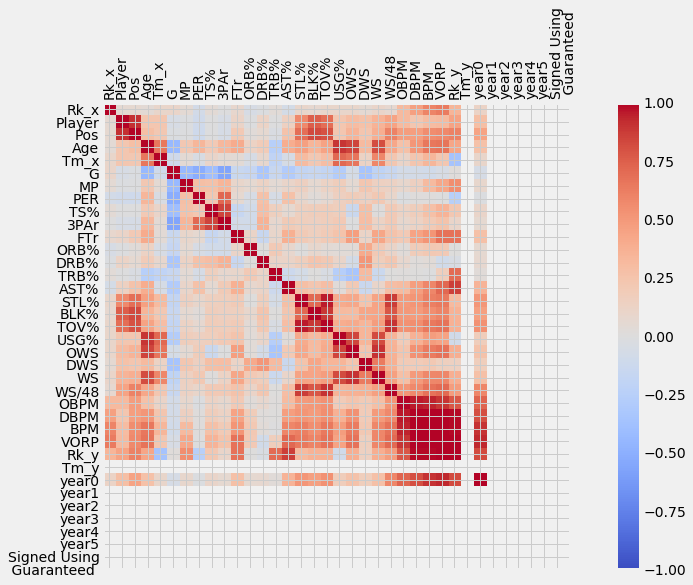

In [47]:
corr = df1.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap = 'coolwarm', vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, len(df1.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation = 90)
ax.set_yticks(ticks)
ax.set_xticklabels(df1.columns)
ax.set_yticklabels(df1.columns)
plt.show()

### This shows us a high level overview of the correlation between different features. The darker the red, the more positively correlated. The darker the blue, the more negatively correlated. The lighter the color, minimal or no correlation.

### For initial analysis, let's examine just those that have contributed to Win Share and have a contract in the 2018-19 season (year0)

In [48]:
df2 = df1.dropna(subset = ['year0', 'WS'])

In [49]:
print(len(df2))

751


### Let's take a quick glance at the distribution of Win Shares

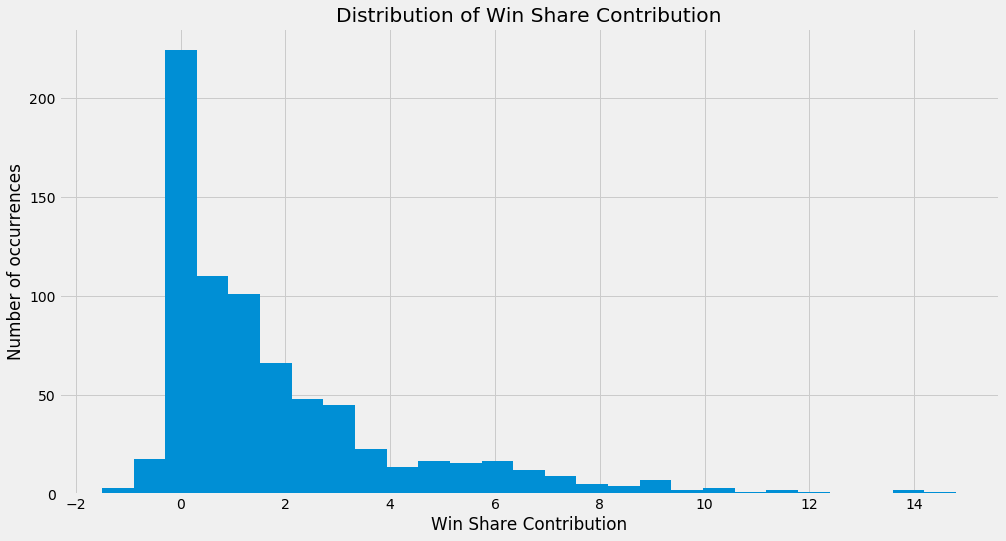

In [50]:
WS = df2['WS']

n_bins = np.sqrt(len(WS))

n_bins = int(n_bins)

_ = plt.figure(figsize = (15, 8))
_ = plt.hist(WS, bins = n_bins)
_ = plt.xlabel('Win Share Contribution')
_ = plt.ylabel('Number of occurrences')
_ = plt.title('Distribution of Win Share Contribution')

plt.show()

### Quick glance at salary distribution for 2018-19 (year0) 

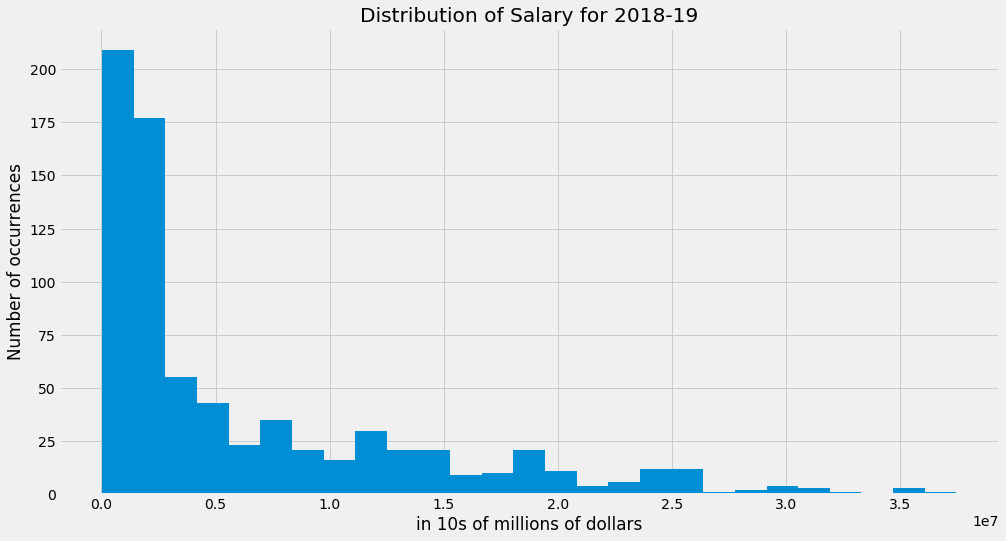

In [51]:
salary0 = df2['year0']
n_bins = np.sqrt(len(salary0))
n_bins = int(n_bins)

_ = plt.hist(salary0, bins = n_bins)
_ = plt.xlabel('in 10s of millions of dollars')
_ = plt.ylabel('Number of occurrences')
_ = plt.title('Distribution of Salary for 2018-19')

plt.show()

### Because the distribution is not normal in the above contract histogram, let's aim to normalize it by taking the log of this information. What this does is help to not only normalize the data, but to show the incremental change instead of the absolute value change in contracts

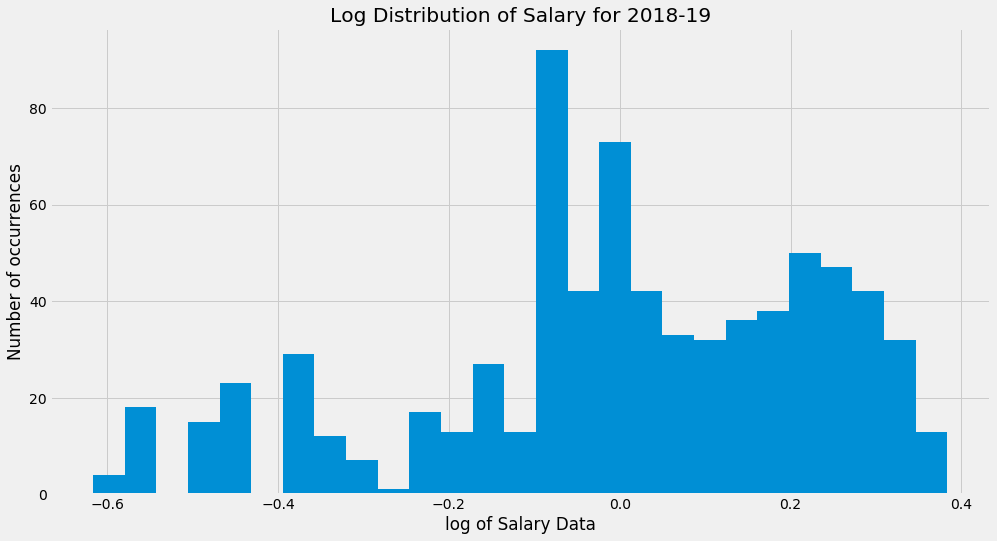

In [52]:
salary0 = np.log(df2['year0'])
max = np.max(salary0)
min = np.min(salary0)
mean = np.mean(salary0)
salary0 = (salary0 - mean) / (max - min)

n_bins = np.sqrt(len(salary0))
n_bins = int(n_bins)

_ = plt.hist(salary0, bins = n_bins)
_ = plt.xlabel('log of Salary Data')
_ = plt.ylabel('Number of occurrences')
_ = plt.title('Log Distribution of Salary for 2018-19')

plt.show()

### Let's take a closer look at the correlation between salary and Win Shares

In [53]:
array = np.array(df2[['year0', 'WS']])
print(array)

[[ 5.455236e+06  7.000000e-01]
 [ 2.139490e+05 -1.000000e-01]
 [ 2.368540e+05  1.000000e-01]
 ...
 [ 1.544951e+06  3.000000e+00]
 [ 1.544951e+06  1.800000e+00]
 [ 1.544951e+06  1.300000e+00]]


In [54]:
df_array = pd.DataFrame({'Salary':array[:,0],'WS':array[:,1]})
print(df_array)

         Salary    WS
0     5455236.0   0.7
1      213949.0  -0.1
2      236854.0   0.1
3    24157304.0   9.1
4     2955840.0   6.6
5    22347015.0   8.8
6     2074320.0  -0.1
7     2034120.0   7.5
8     6957105.0   5.6
9     2516048.0   0.3
10    8641000.0   2.7
11   20421546.0  -0.2
12   20421546.0  -0.2
13   20421546.0   0.0
14    1378242.0  -0.1
15   24157304.0  14.1
16   25534253.0   0.3
17    2393887.0   0.3
18    1952760.0   2.0
19    1349383.0   3.5
20   15000000.0   2.6
21   15000000.0   0.7
22   15000000.0   1.9
23    7250000.0   6.8
24    8165160.0   5.9
25    1378242.0   1.0
26    7305600.0   3.5
27    4544400.0  -0.1
28     170915.0  -0.1
29    4544400.0   0.0
..          ...   ...
721   1667160.0   3.4
722    264919.0   0.0
723  25434263.0   6.0
724  25467250.0   0.5
725    838464.0   1.0
726   8000000.0   5.3
727  14087500.0   3.8
728   1654440.0   1.1
729    122741.0   0.5
730     34183.0   0.5
731   2534280.0   1.5
732   3448926.0   2.6
733   1512601.0   0.8
734   1512

In [55]:
df_array.dtypes

Salary    float64
WS        float64
dtype: object

## Let's explore a scatter plot of WS to Salary

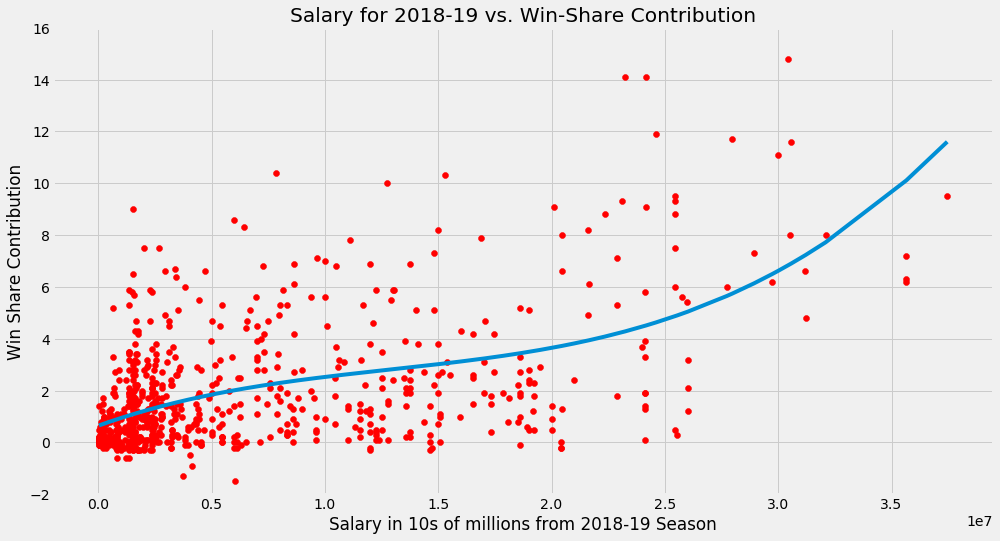

In [56]:
x = df_array.Salary
y = df_array.WS

_ = plt.title('Salary for 2018-19 vs. Win-Share Contribution')
_ = plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 3))(np.unique(x)))
_ = plt.scatter(x = x, y = y, color = 'red')
_ = plt.xlabel('Salary in 10s of millions from 2018-19 Season')
_ = plt.ylabel('Win Share Contribution')
_ = plt.ylim([-2, 16])

plt.show()

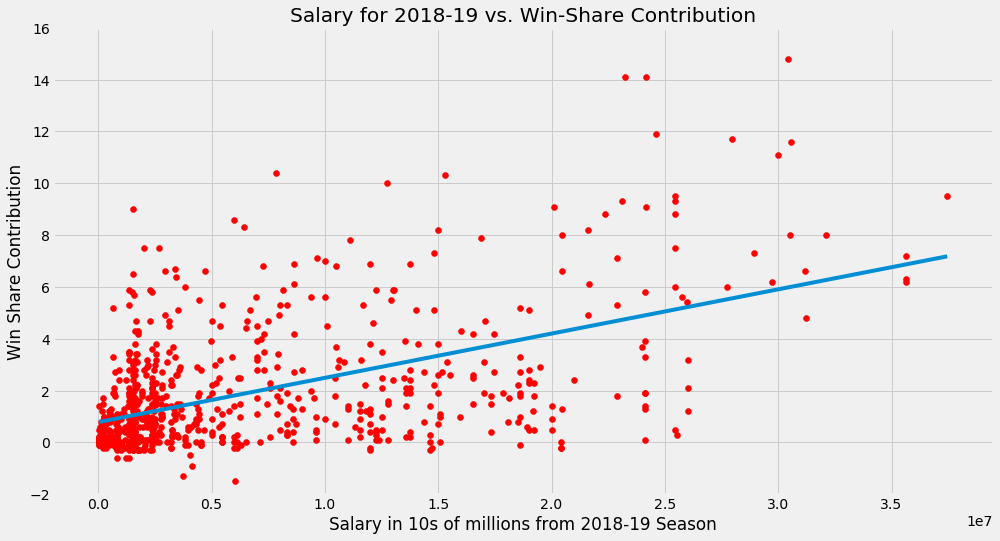

In [57]:
x = df_array.Salary
y = df_array.WS

_ = plt.title('Salary for 2018-19 vs. Win-Share Contribution')
_ = plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
_ = plt.scatter(x = x, y = y, color = 'red')
_ = plt.xlabel('Salary in 10s of millions from 2018-19 Season')
_ = plt.ylabel('Win Share Contribution')
_ = plt.ylim([-2, 16])

plt.show()

### You can see that an exponential curve is a better fit of the data than a linear fit.

In [58]:
print('The linear correlation of salary to win share contribution for 2018-19 is: {}'.format(np.corrcoef(x, y)[0, 1]))

The linear correlation of salary to win share contribution for 2018-19 is: 0.5354315789872001


### A quick breakdown of the linear fit using Least Squares as our measurement of accuracy is below:

In [59]:
m = ols('Salary ~ WS',df_array).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     301.0
Date:                Mon, 17 Jun 2019   Prob (F-statistic):           6.14e-57
Time:                        13:05:55   Log-Likelihood:                -12834.
No. Observations:                 751   AIC:                         2.567e+04
Df Residuals:                     749   BIC:                         2.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.253e+06   2.96e+05     10.989      0.0

### Let's get a better understanding of what 2018-19 salary and Win Share data actually look like 

In [60]:
df_array.describe()

,Salary,WS
count,7.510000e+02,751.000000
mean,6.408062e+06,1.879228
std,7.574114e+06,2.415427
min,3.418300e+04,-1.500000
25%,1.378242e+06,0.200000
50%,2.667600e+06,1.100000
75%,9.815625e+06,2.650000
max,3.745715e+07,14.800000


#### This tells us quite a bit of information in a small table. We can see the average salary is ~6.41 million USD and average WS is ~1.879.

#### There is also a range of ~34,200 to ~37.5 million in 2018-19 salary.
#### The range for WS is -1.5 to 14.8.

#### What this tells us is that the average NBA player in 2018-19 season averaged ~6.41 million USD and had a contribution of ~1.879 Win Shares.

### One thing to note here is that 75% of the players earn less than 9.82 million in 2018-19. We can also see that 75% of the players contributed 2.65 Win Shares or less. These numbers are staggering and show just how few stars and superstars there are in the league. 

### As shown in the scatter plot above, there are quite a few players who are contributing above the average Win Share of 1.879 and making less than the average salary of 6.41 million. We will explore further below.

In [61]:
#This sums the number of players that have a greater than average Win Share

sum(i > 1.879 for i in df_array.WS)

265

In [62]:
#This sums the number of players that have a greater than 2.65 Win Share

sum(i > 2.65 for i in df_array.WS)

188

In [63]:
#This sums the number of players that have a greater than average salary

sum(i > 6410000 for i in df_array.Salary)

250

In [64]:
#This sums the number of players that have a greater than 9.82 million USD salary

sum(i > 9820000 for i in df_array.Salary)

188

### Wrapping Things Up:

#### This initial analysis brought answers to quite a few questions that we had posed at the beginning. We were able to identify an exponential correlation between salary and Win Shares. We were also able to see the distribution among 2018-19 salary information and the Win Shares contribution. However, in looking closer those distributions, they were not of normal distribution. There was a tail for both plots with the majority of the data points coming from the early part of the distribution. 

#### Looking at the relationship between WS and Salary, it is clear that there is a positive linear correlation, but it is fairly weak. An exponential curve appears to be a better fit to the data. We can also see that the majority of players are below average when it comes to the average salary and average WS contribution in 2018-19. We can also see on the scatter plot, that there are some players that are really skewing the data as they are near the maximums. The log histogram plot of the salary information above helps to normalize and show the relative change in data vs the absolute change. 

#### This initial analysis opens up more questions that will be explored to help complete this analysis. Can we predict what a player's contribution to WS should be based upon salary? What about the reverse, can we predict a player's upcoming salary based upon their WS? How much of a player's salary is not determined by their on court influence? Is this measureable? 

#### As the analysis continues, I look forward to answering these questions and more.